In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import & Clean Data

In [2]:
raw_df = pd.read_csv("DA_Race_Turnout.csv")

In [3]:
raw_df

,Unnamed: 0,Unnamed: 0.1,WP,CARVALHO,CHAMPION,HENNING,McAULIFFE,ROLLINS,OTHERS,VOTES_CAST,...,Other Race Percentage,Two or more races Percentage,Hispanic Percentage,White Percentage,White plurality (Y/N),Black plurality (Y/N),Hispanic plurality (Y/N),Asian plurality (Y/N),Turnout,Rollins Percentage
0,0,0,0101,49,17,68,45,138,1,318,...,10.075713,3.494467,29.295282,79.732091,Y,N,N,N,0.230117,39.093484
1,1,1,0102,46,12,27,18,66,0,169,...,16.948334,4.538870,51.810719,73.394495,Y,N,N,N,0.173214,34.020619
2,2,2,0103,95,53,54,44,174,2,422,...,15.539478,5.662158,41.333753,62.566845,Y,N,N,N,0.188002,35.365854
3,3,3,0104,34,13,21,11,45,2,126,...,29.458599,6.581741,63.853503,58.227176,N,N,Y,N,0.141026,31.468531
4,4,4,0105,40,18,50,23,67,0,198,...,31.024931,5.297784,57.617729,57.444598,N,N,Y,N,0.171131,29.130435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,250,250,1819,81,146,142,40,182,2,593,...,7.671550,3.392444,18.003084,40.323824,N,Y,N,N,0.234989,28.706625
251,251,251,1821,169,89,41,8,147,3,457,...,5.804625,2.925908,11.184521,5.238320,N,Y,N,N,0.243844,29.108911
252,252,252,1823,66,56,35,38,93,0,288,...,12.384937,2.677824,25.523013,21.338912,N,Y,N,N,0.231241,27.433628
253,253,253,0502A,36,24,29,24,55,2,170,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.777778


<h3> Drop columns that are useless/unknown/unidentified </h3>

In [4]:
drop_columns = ['Unnamed: 0', 'Unnamed: 0.1'] #unidentified/unknown columns (what it represents)
drop_columns += ['Ward', 'Precinct'] #WP == WARD and Precinct == WP
drop_columns += ['Total.1'] #Total == Total.1; infer that total means the # of people in the precinct

drop_columns.append('TOTAL') #VOTES_CAST == TOTAL; therefore VOTES_CAST --> "TOTAL VOTES CAST"
rename_columns={'VOTE CAST': 'VOTE_CAST', 'BALLOTS CAST': 'BALLOTS_CAST'} #rename for better representation

In [42]:
def clean_columns(df, drop_columns=[], rename_columns={}):
    new_df = df.drop(drop_columns, axis=1).dropna()
    return new_df.rename(columns=rename_columns)

In [43]:
clean_df = clean_columns(raw_df, drop_columns, rename_columns)

In [44]:
clean_df.head()

,WP,CARVALHO,CHAMPION,HENNING,McAULIFFE,ROLLINS,OTHERS,VOTES_CAST,BLANKS,BALLOTS_CAST,...,Other Race Percentage,Two or more races Percentage,Hispanic Percentage,White Percentage,White plurality (Y/N),Black plurality (Y/N),Hispanic plurality (Y/N),Asian plurality (Y/N),Turnout,Rollins Percentage
0,0101,49,17,68,45,138,1,318,35,353,...,10.075713,3.494467,29.295282,79.732091,Y,N,N,N,0.230117,39.093484
1,0102,46,12,27,18,66,0,169,25,194,...,16.948334,4.538870,51.810719,73.394495,Y,N,N,N,0.173214,34.020619
2,0103,95,53,54,44,174,2,422,70,492,...,15.539478,5.662158,41.333753,62.566845,Y,N,N,N,0.188002,35.365854
3,0104,34,13,21,11,45,2,126,17,143,...,29.458599,6.581741,63.853503,58.227176,N,N,Y,N,0.141026,31.468531
4,0105,40,18,50,23,67,0,198,32,230,...,31.024931,5.297784,57.617729,57.444598,N,N,Y,N,0.171131,29.130435


# Analysis

<h3> # of Precinct Won of each candidate </h3>

In [45]:
# num of wins of each participant
winners_df = clean_df[['WP', 'CARVALHO', 'CHAMPION', 'HENNING', 'McAULIFFE', 'ROLLINS', 'OTHERS']]

In [46]:
winners_df.head()

,WP,CARVALHO,CHAMPION,HENNING,McAULIFFE,ROLLINS,OTHERS
0,0101,49,17,68,45,138,1
1,0102,46,12,27,18,66,0
2,0103,95,53,54,44,174,2
3,0104,34,13,21,11,45,2
4,0105,40,18,50,23,67,0


In [47]:
winners_df['WON'] = winners_df.drop('WP', axis=1).idxmax(axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
winners_df.head()

,WP,CARVALHO,CHAMPION,HENNING,McAULIFFE,ROLLINS,OTHERS,WON
0,0101,49,17,68,45,138,1,ROLLINS
1,0102,46,12,27,18,66,0,ROLLINS
2,0103,95,53,54,44,174,2,ROLLINS
3,0104,34,13,21,11,45,2,ROLLINS
4,0105,40,18,50,23,67,0,ROLLINS


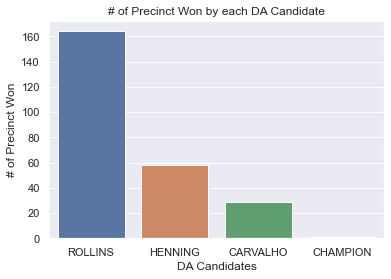

In [56]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="WON", data=winners_df)
plt.ylabel('# of Precinct Won')
plt.xlabel('DA Candidates')
plt.title('# of Precinct Won by each DA Candidate')
plt.show()

We could see from this countplot that Rollins won the DA Race by a significant amount

<h3> Analyze by Race </h3>

<h4> Percentage of Black in each Precinct vs Candidate that won in that precinct </h4>

In [60]:
#get the columns we want to analyze this
black_percentage_df = clean_df[['WP','Black Percentage']]
black_percentage_df = pd.merge(black_percentage_df, winners_df[['WP', 'WON']])

In [61]:
black_percentage_df.head()

,WP,Black Percentage,WON
0,0101,3.203262,ROLLINS
1,0102,2.945437,ROLLINS
2,0103,8.744888,ROLLINS
3,0104,3.025478,ROLLINS
4,0105,2.666205,ROLLINS


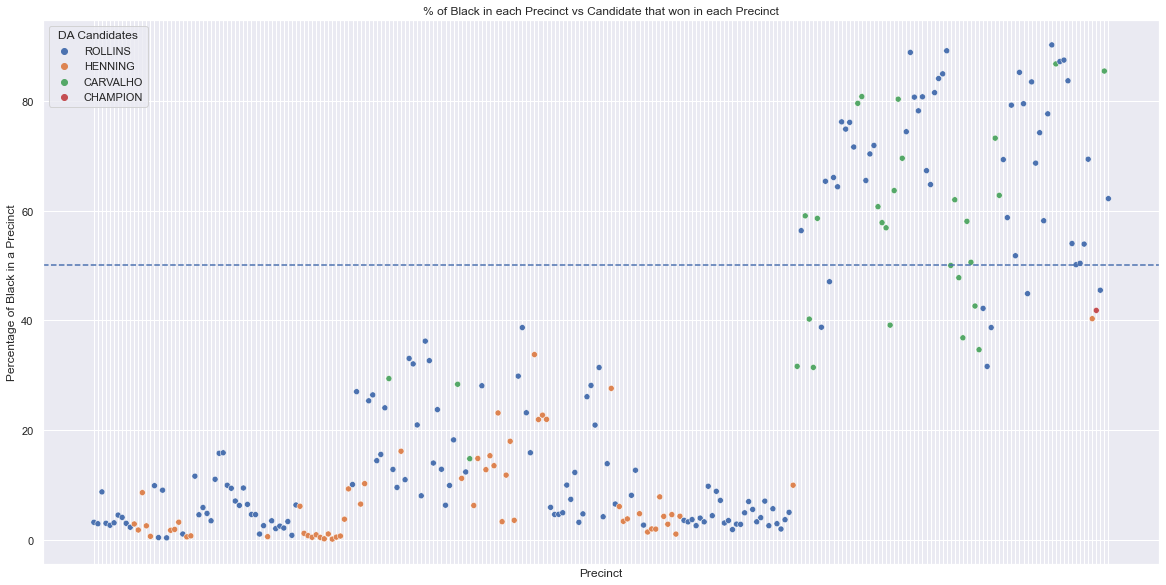

In [81]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(ax=ax, data=black_percentage_df, x='WP', y='Black Percentage', hue='WON')
ax.legend(title='DA Candidates')
ax.axhline(50, ls='--')
plt.setp(ax.get_xticklabels(), visible=False)
plt.ylabel('Percentage of Black in a Precinct')
plt.xlabel('Precinct')
plt.title('% of Black in each Precinct vs Candidate that won in each Precinct')
plt.show()

<h4> Percentage of White in each Precinct vs Candidate that won in that precinct </h4>

In [77]:
#get the columns we want to analyze this
white_percentage_df = clean_df[['WP','White Percentage']]
white_percentage_df = pd.merge(white_percentage_df, winners_df[['WP', 'WON']])

In [78]:
white_percentage_df.head()

,WP,White Percentage,WON
0,0101,79.732091,ROLLINS
1,0102,73.394495,ROLLINS
2,0103,62.566845,ROLLINS
3,0104,58.227176,ROLLINS
4,0105,57.444598,ROLLINS


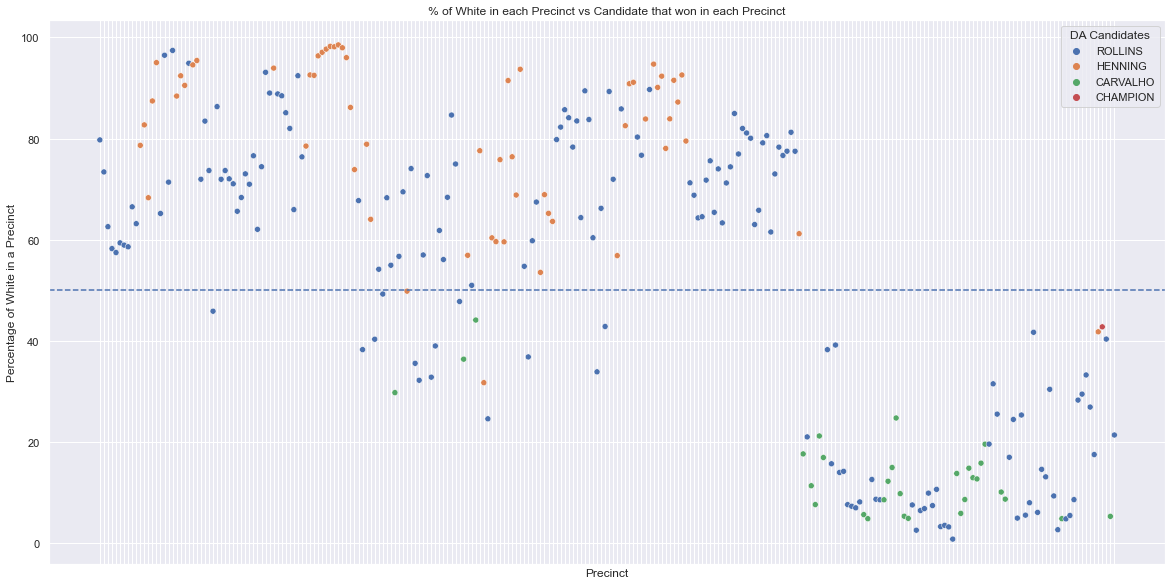

In [82]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(ax=ax, data=white_percentage_df, x='WP', y='White Percentage', hue='WON')
ax.legend(title='DA Candidates')
ax.axhline(50, ls='--')
plt.setp(ax.get_xticklabels(), visible=False)
plt.ylabel('Percentage of White in a Precinct')
plt.xlabel('Precinct')
plt.title('% of White in each Precinct vs Candidate that won in each Precinct')
plt.show()

<h4> Written analysis </h4>

From the two graphs above, we could see that all of the precincts with black population over 50% support Rollings & Carvalho, while Henning, although second in the order of votes, mostly receive his votes from precincts with dense white population. However, these premilinary analysis doesn't provide enough evidences to support the hypothesis that black voters are more likely to vote for black candidates. This is because we don't have enough data of the voters to get an accurate measure. For example, if we were to set a horizontal line at 70-80% in the first graph, we could see that the precincts with dense black population mostly vote for Rollings & Carvalho, which would likely signifies that most black in those specific precincts support black candidates; however, that is very sample and therefore is not enough to support the hypothesis. Furthermore, this could not be say the same for any precinct with black percentage below 70-80%, since it is possible that the precincts with lower than 70% black population could have won because of other race other than black. Furthermore, we are using the race percentage of the population, not the race percantge of voters.